# Spline features

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer

In [3]:
# Let's simulate the a sine relation between a
# predictor variable X and y

X = np.linspace(-1, 11, 20)
y = np.sin(X)

In [6]:
plt.rcParams["figure.dpi"] = 450

Text(0.5, 0, 'X')

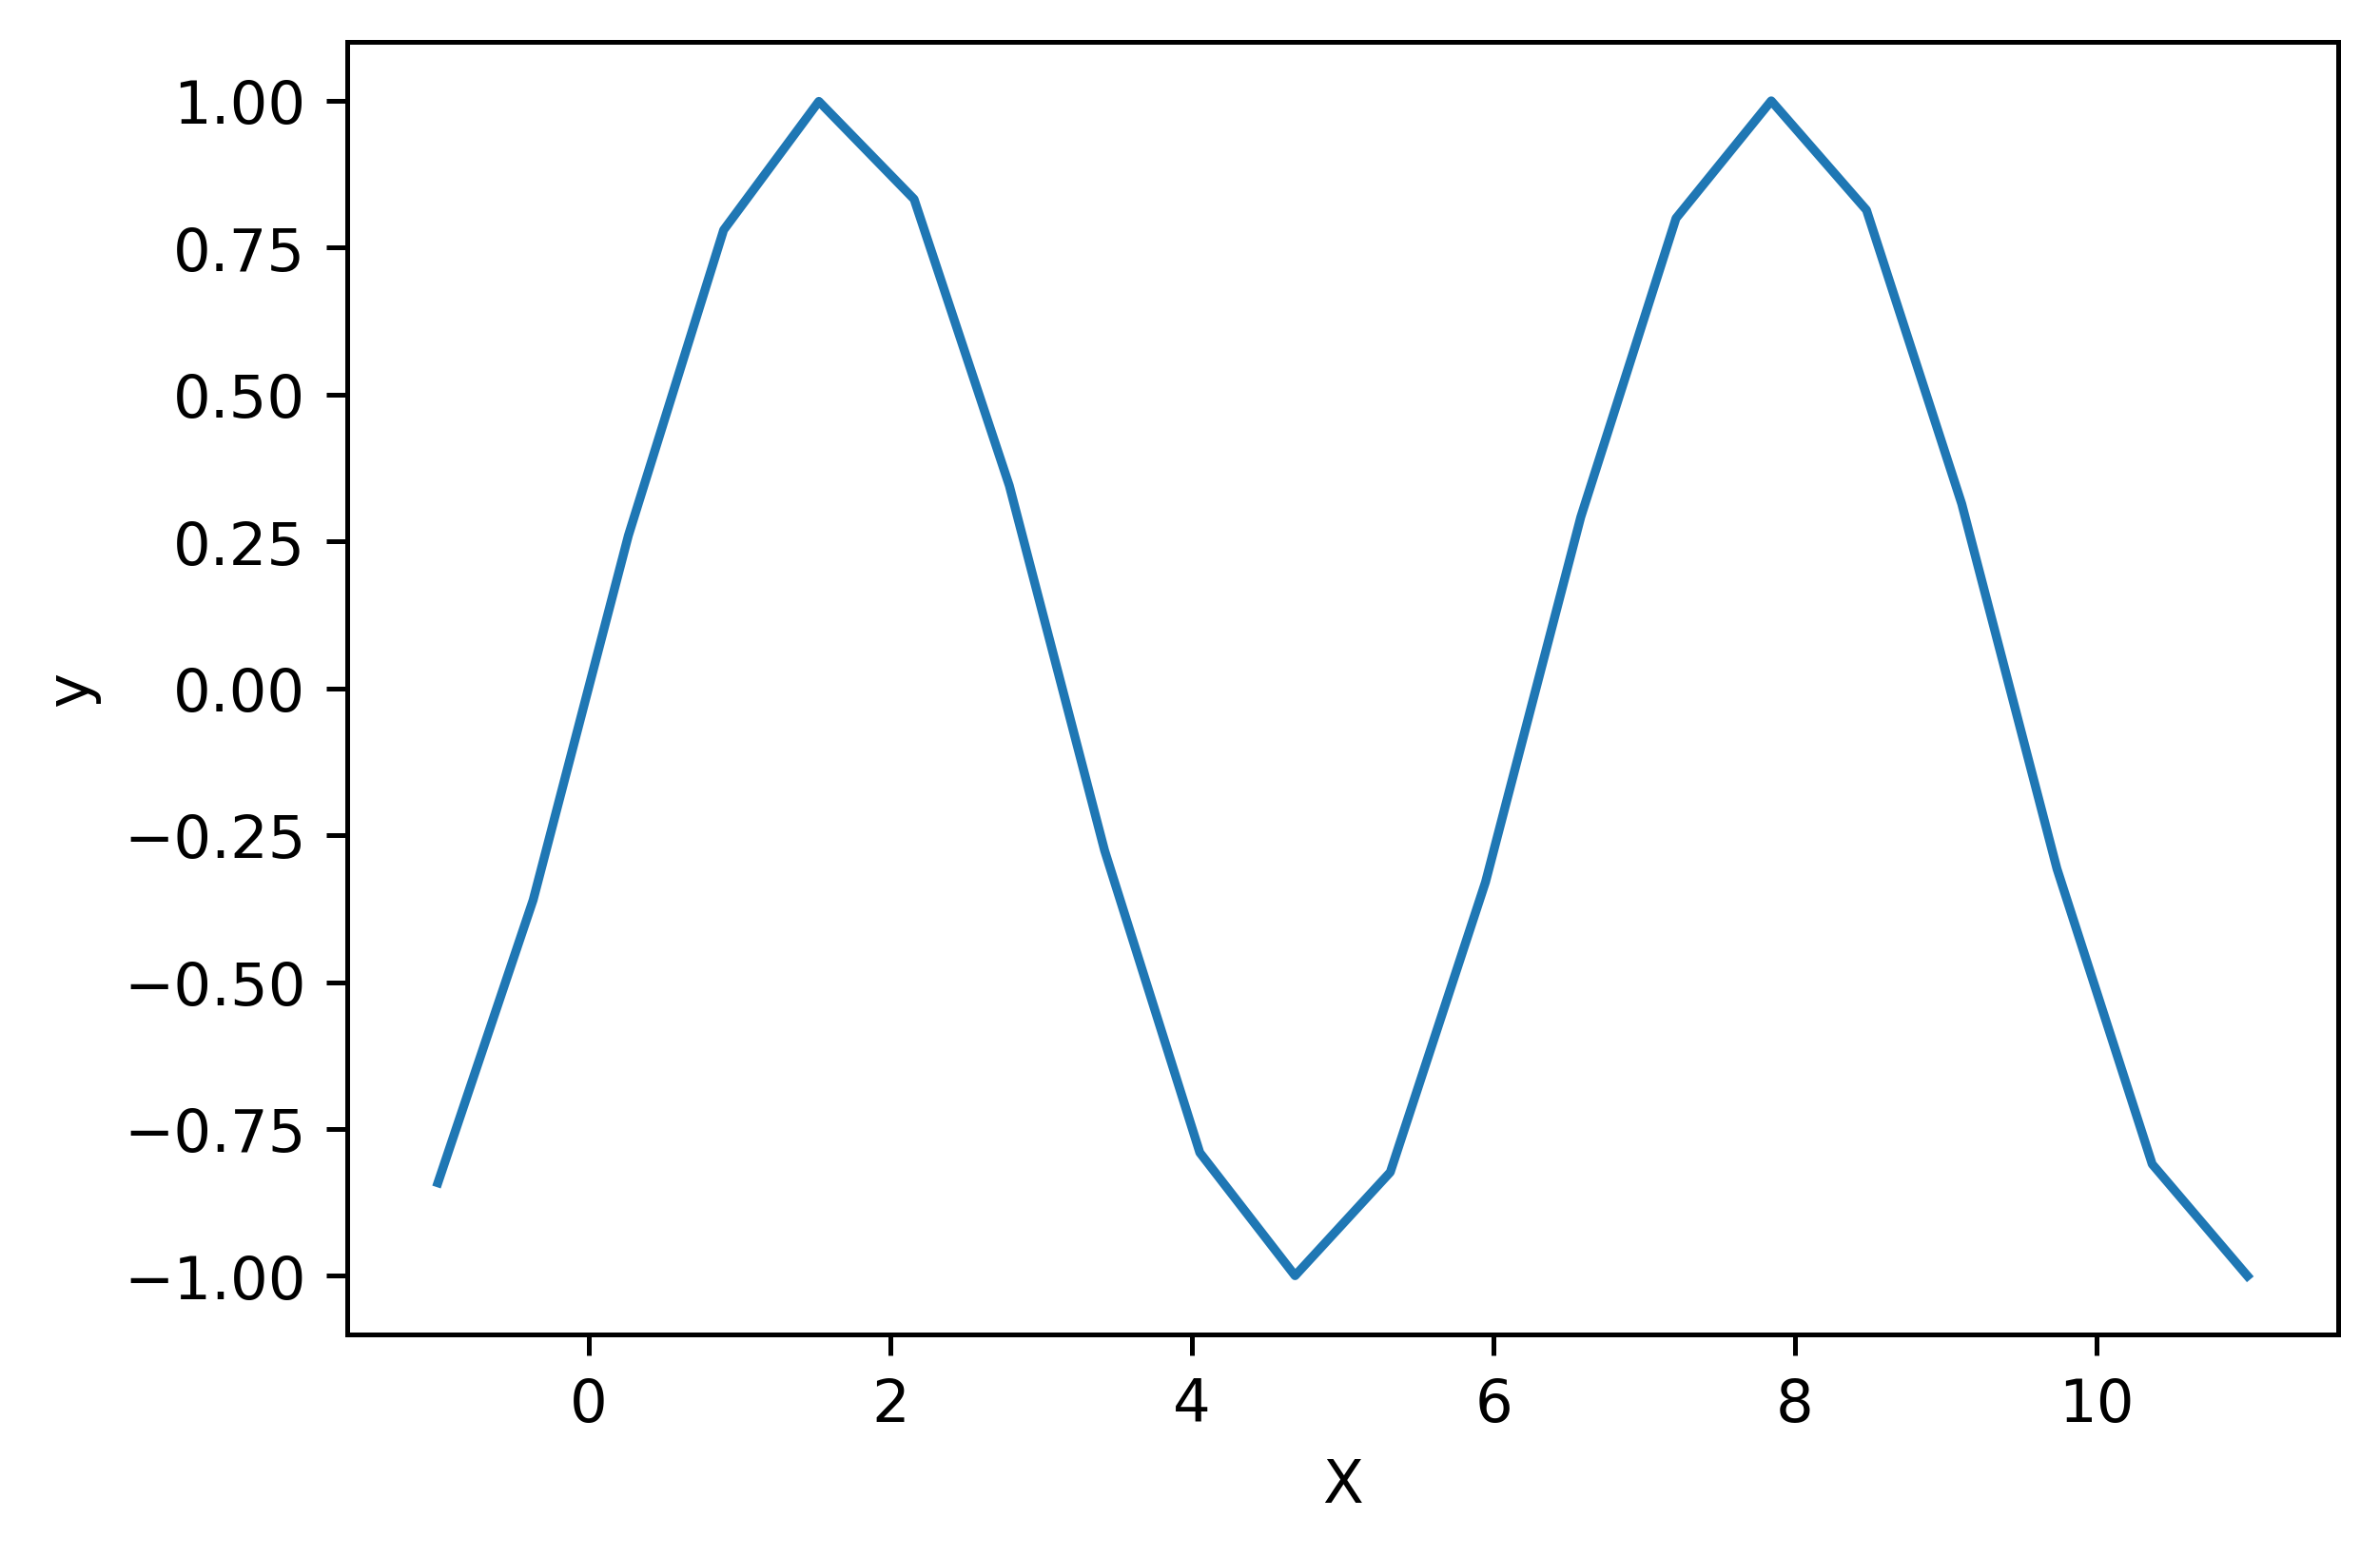

In [7]:
# plot

plt.plot(X, y)
plt.ylabel("y")
plt.xlabel("X")

In [8]:
# Let's fit a linear model

linmod = Ridge(random_state=10)
linmod.fit(X.reshape(-1, 1), y)
pred = linmod.predict(X.reshape(-1, 1))

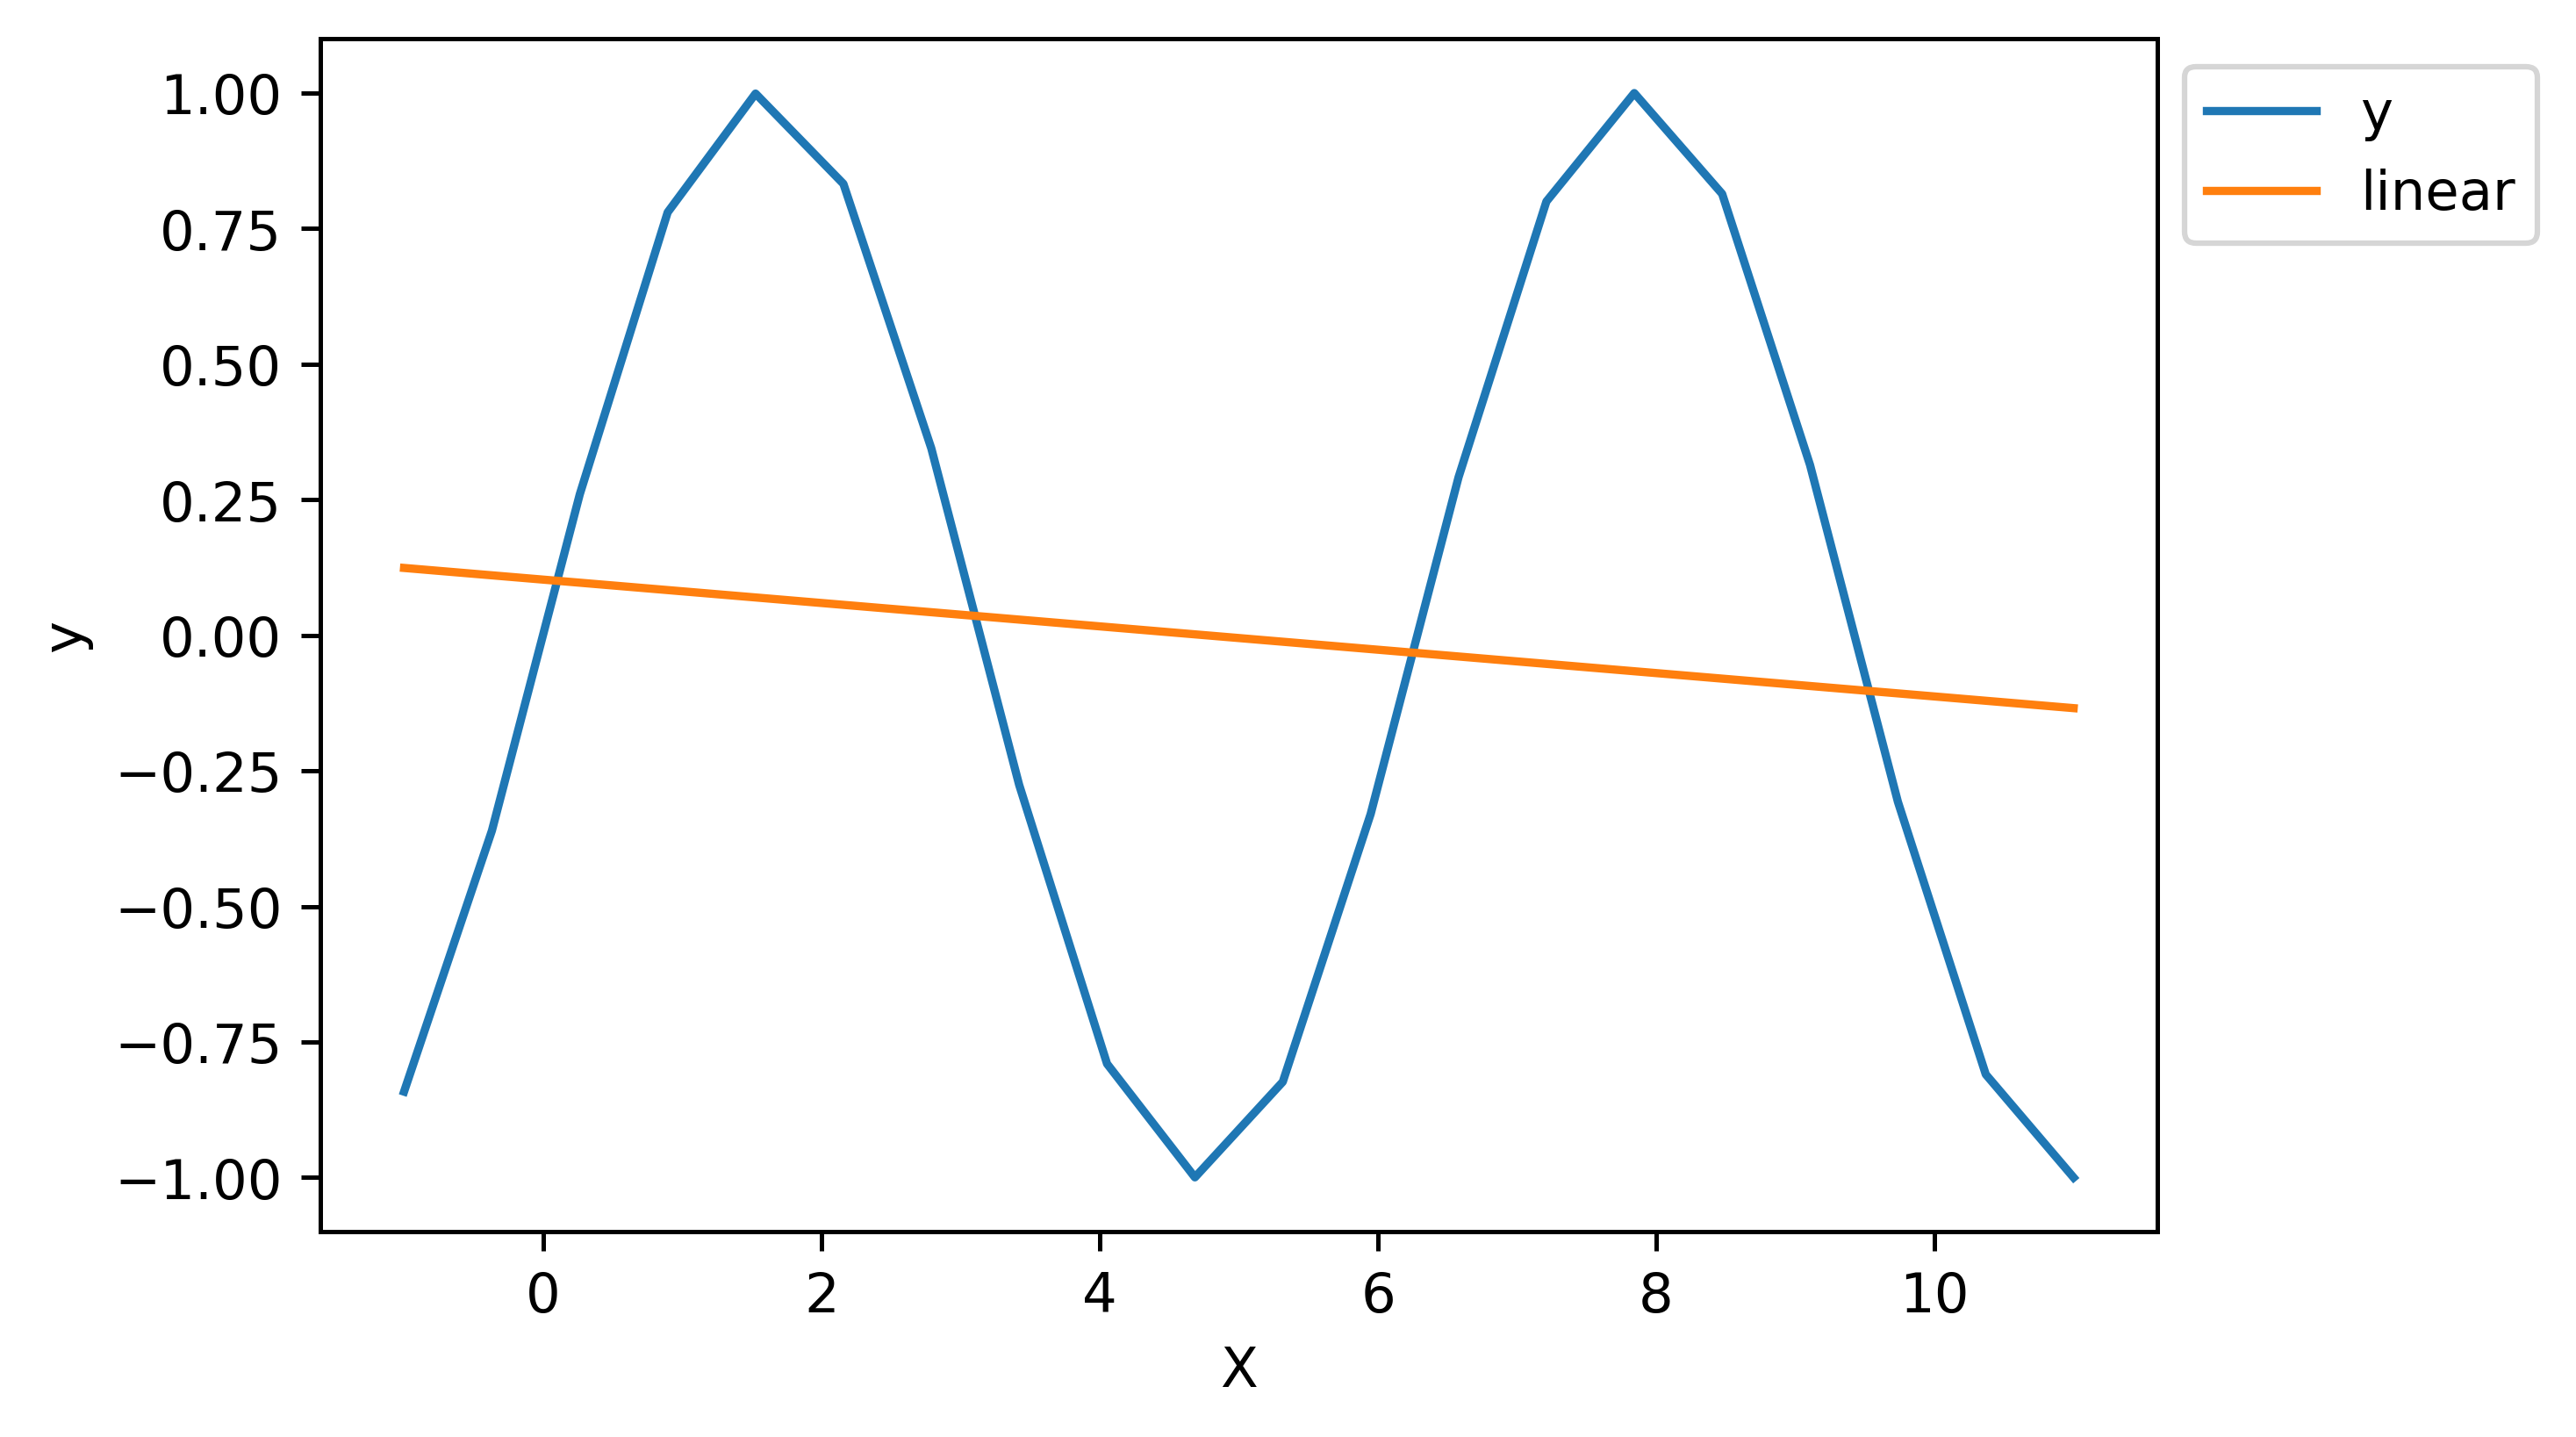

In [9]:
# Let's plot the preditions

plt.plot(X, y)
plt.plot(X, pred)
plt.ylabel("y")
plt.xlabel("X")
plt.legend(["y", "linear"], bbox_to_anchor=(1, 1), loc="upper left")

In [10]:
# Let's obtain create spline variables from X

spl = SplineTransformer(degree=3, n_knots=5)

X_t = spl.fit_transform(X.reshape(-1, 1))

X_df = pd.DataFrame(X_t, columns=spl.get_feature_names_out(["var"]))

X_df.head()

,var_sp_0,var_sp_1,var_sp_2,var_sp_3,var_sp_4,var_sp_5,var_sp_6
0,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0
1,0.082009,0.627011,0.289425,0.001555,0.0,0.0,0.0
2,0.032342,0.526705,0.428512,0.012441,0.0,0.0,0.0
3,0.008335,0.393741,0.555936,0.041989,0.0,0.0,0.0
4,0.000656,0.256111,0.643704,0.099529,0.0,0.0,0.0


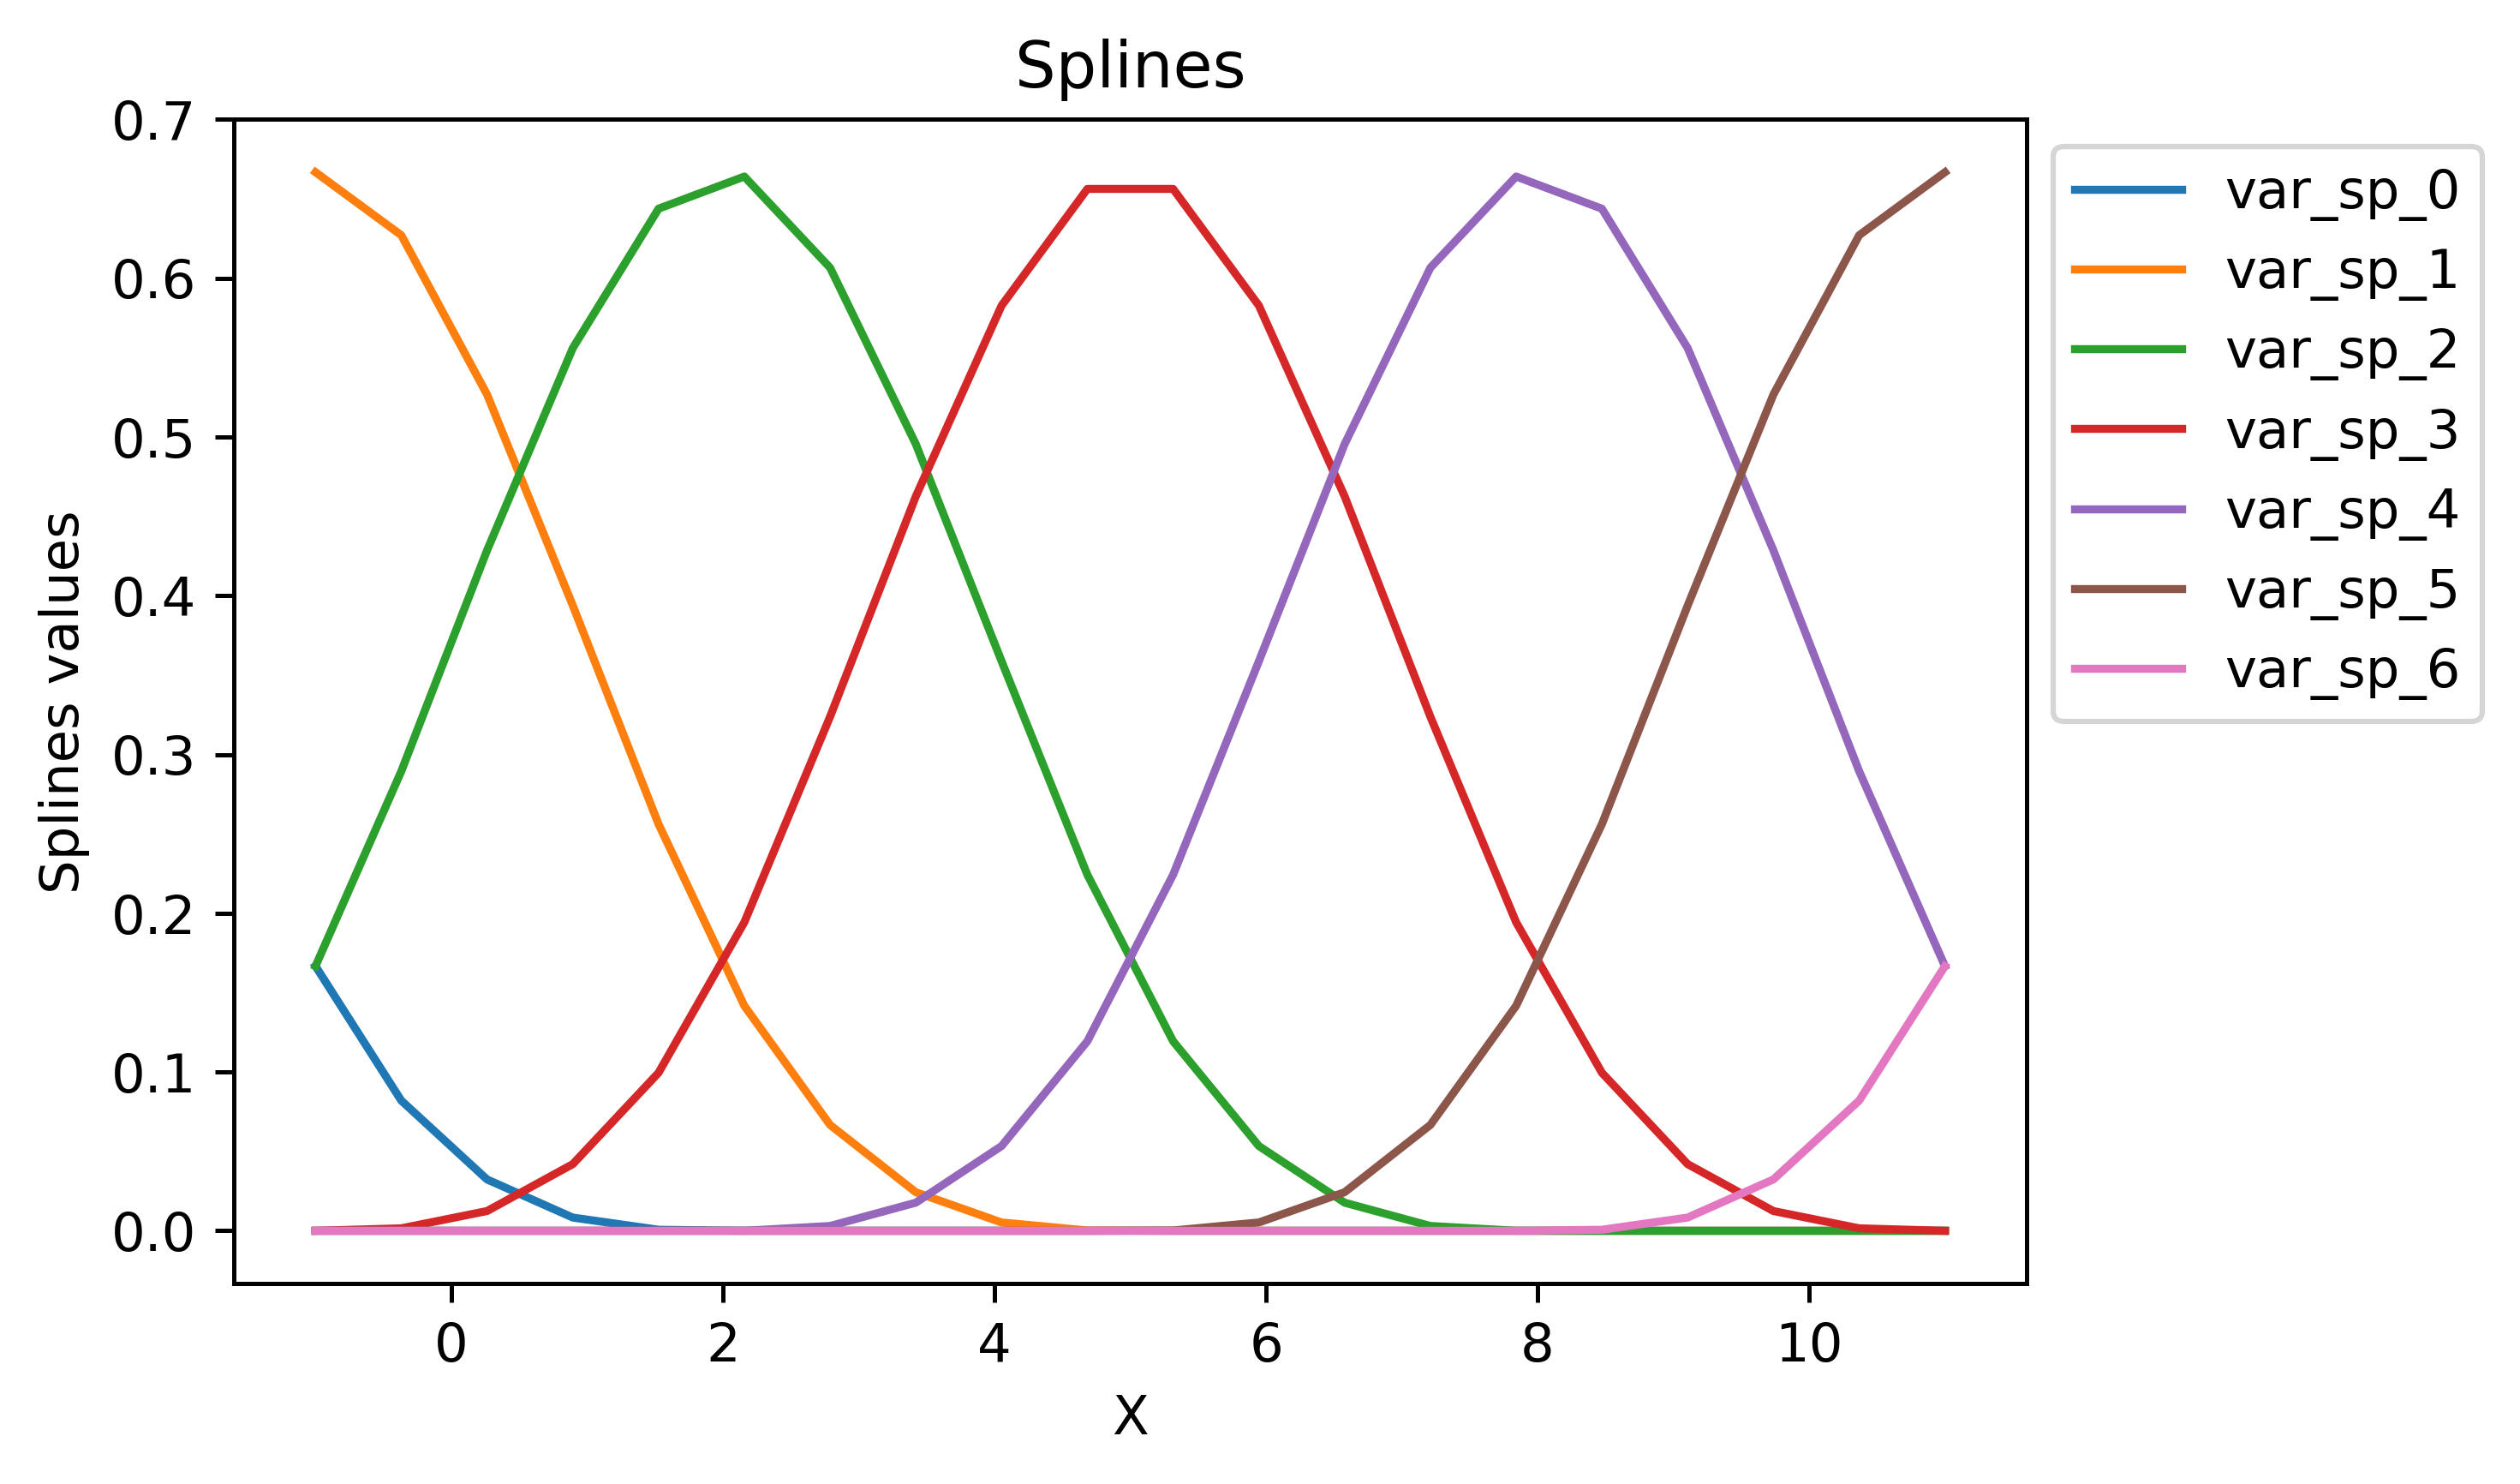

In [11]:
# PLot the spline representation of X

plt.plot(X, X_t)
plt.legend(spl.get_feature_names_out(["var"]), bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("X")
plt.ylabel("Splines values")
plt.title("Splines")
plt.show()

In [12]:
linmod = Ridge(random_state=10)
linmod.fit(X_t, y)
pred = linmod.predict(X_t)

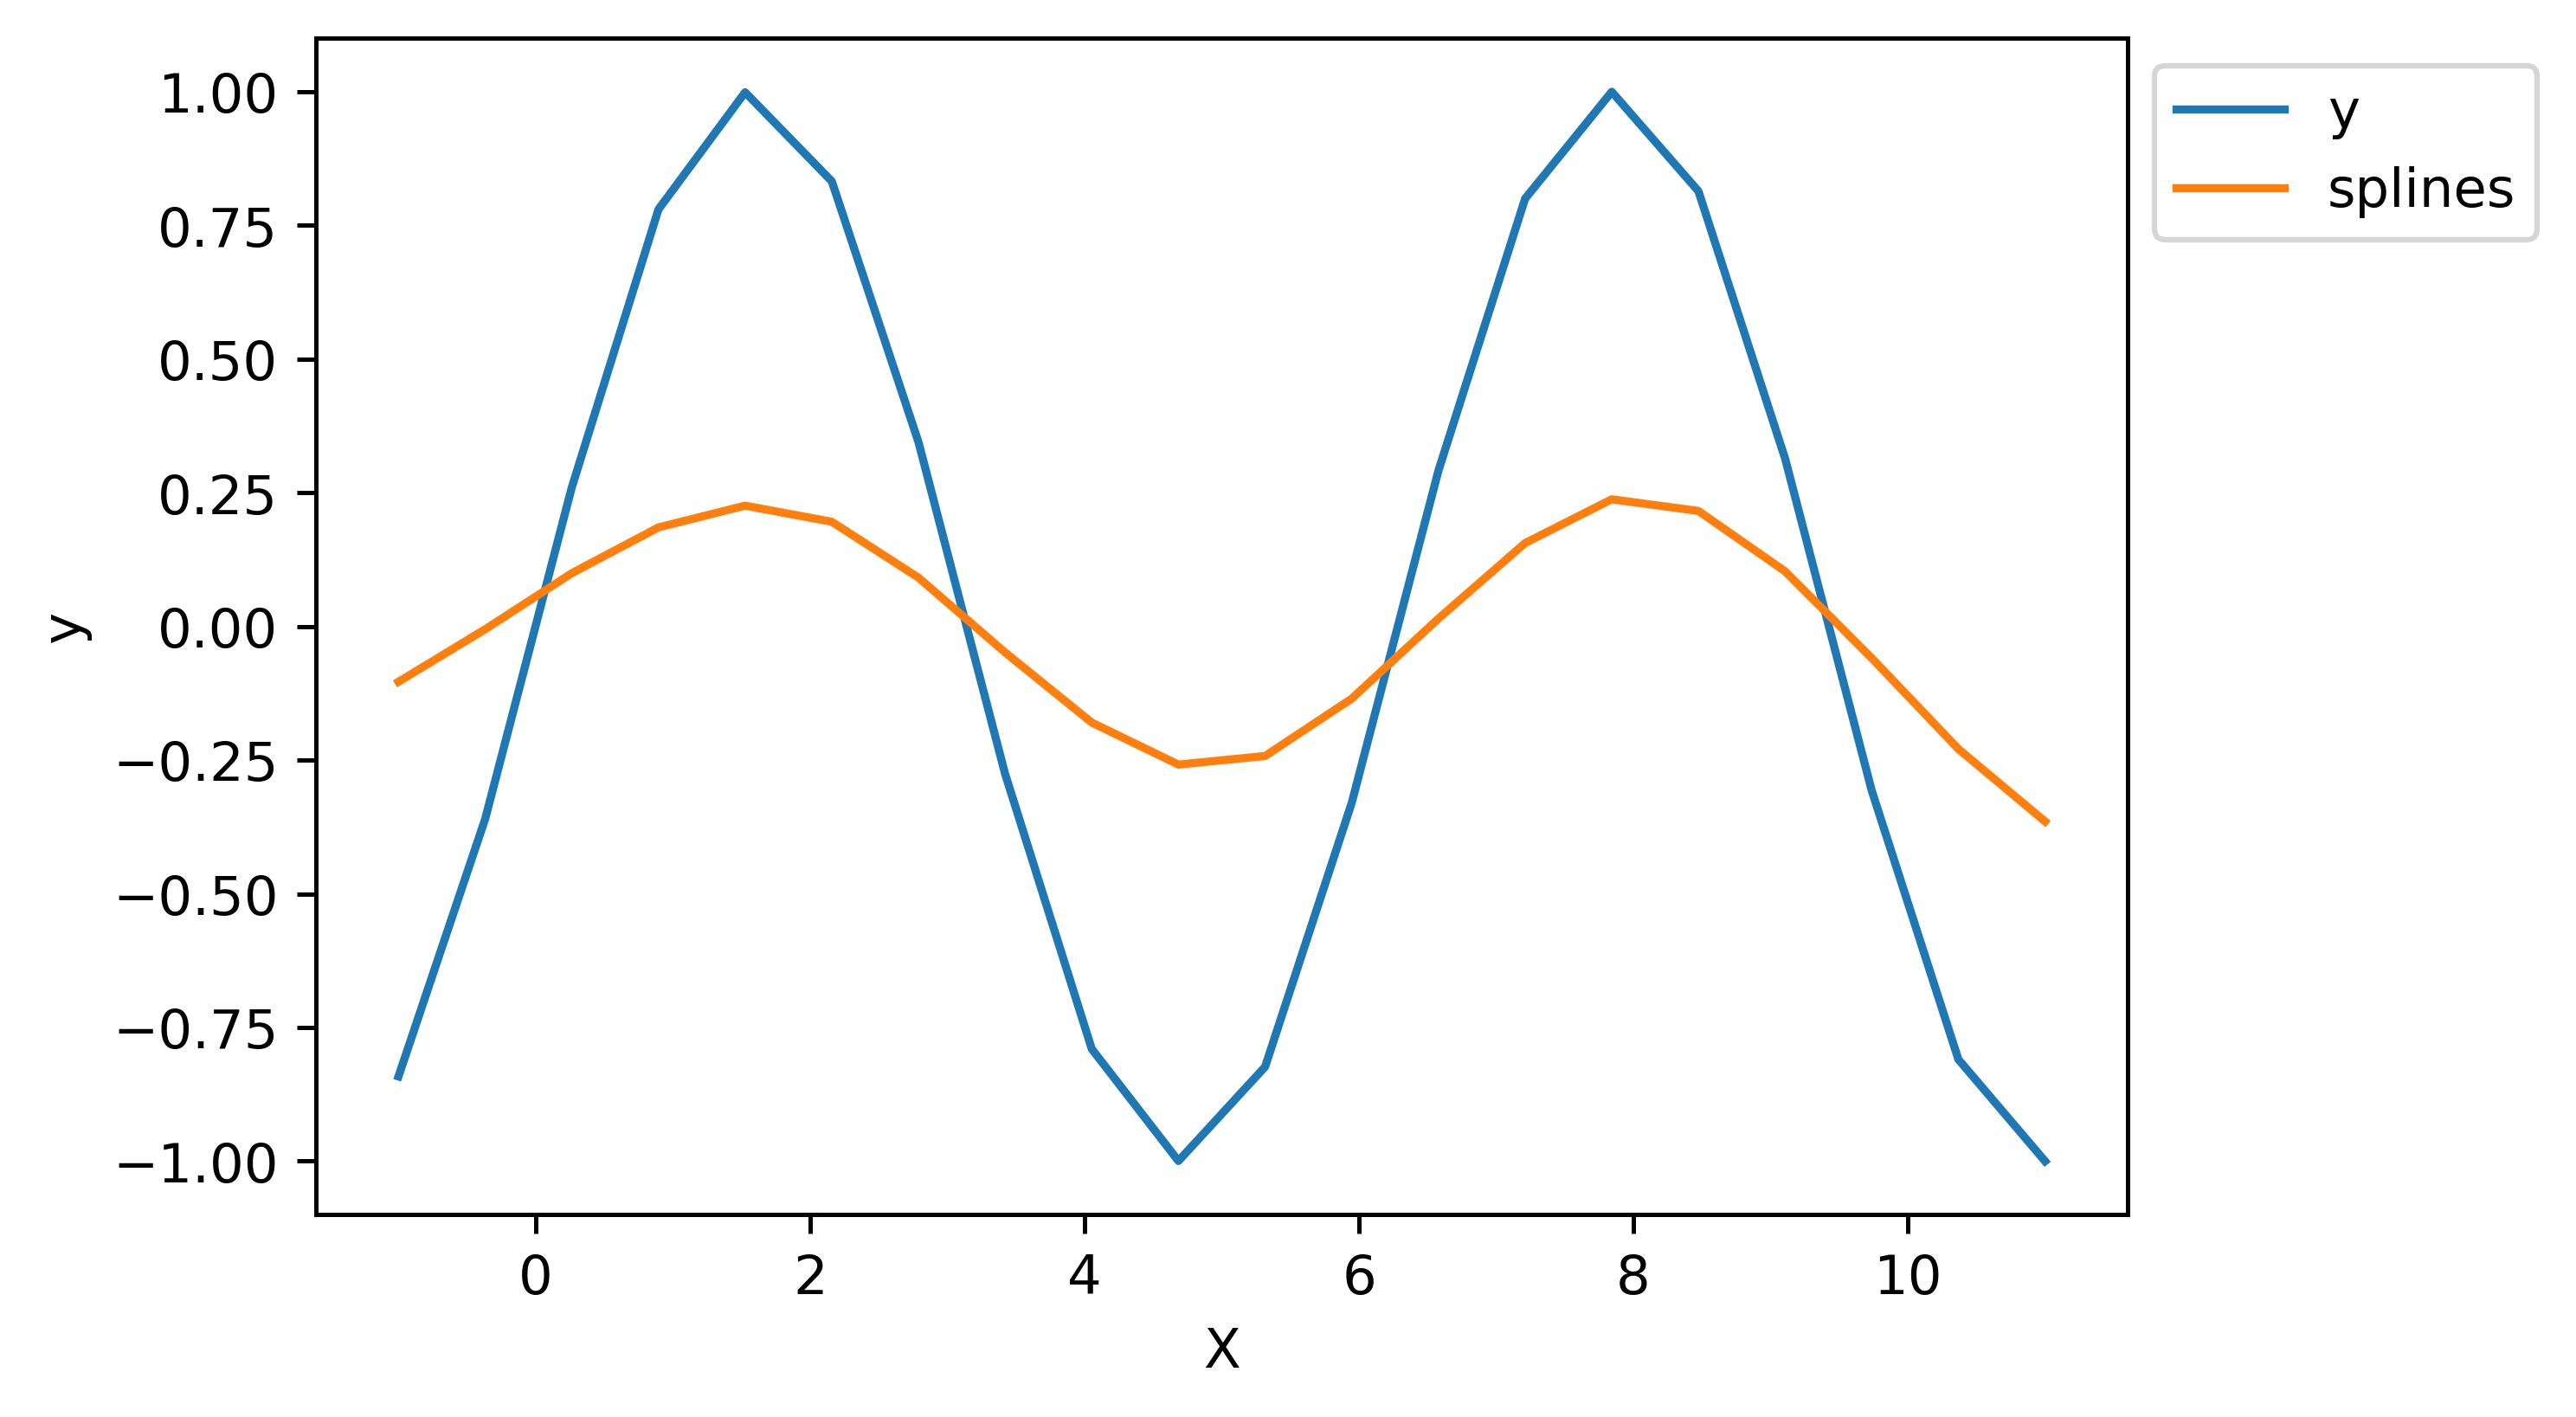

In [13]:
plt.plot(X, y)
plt.plot(X, pred)
plt.ylabel("y")
plt.xlabel("X")
plt.legend(["y", "splines"], bbox_to_anchor=(1, 1), loc="upper left")

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate

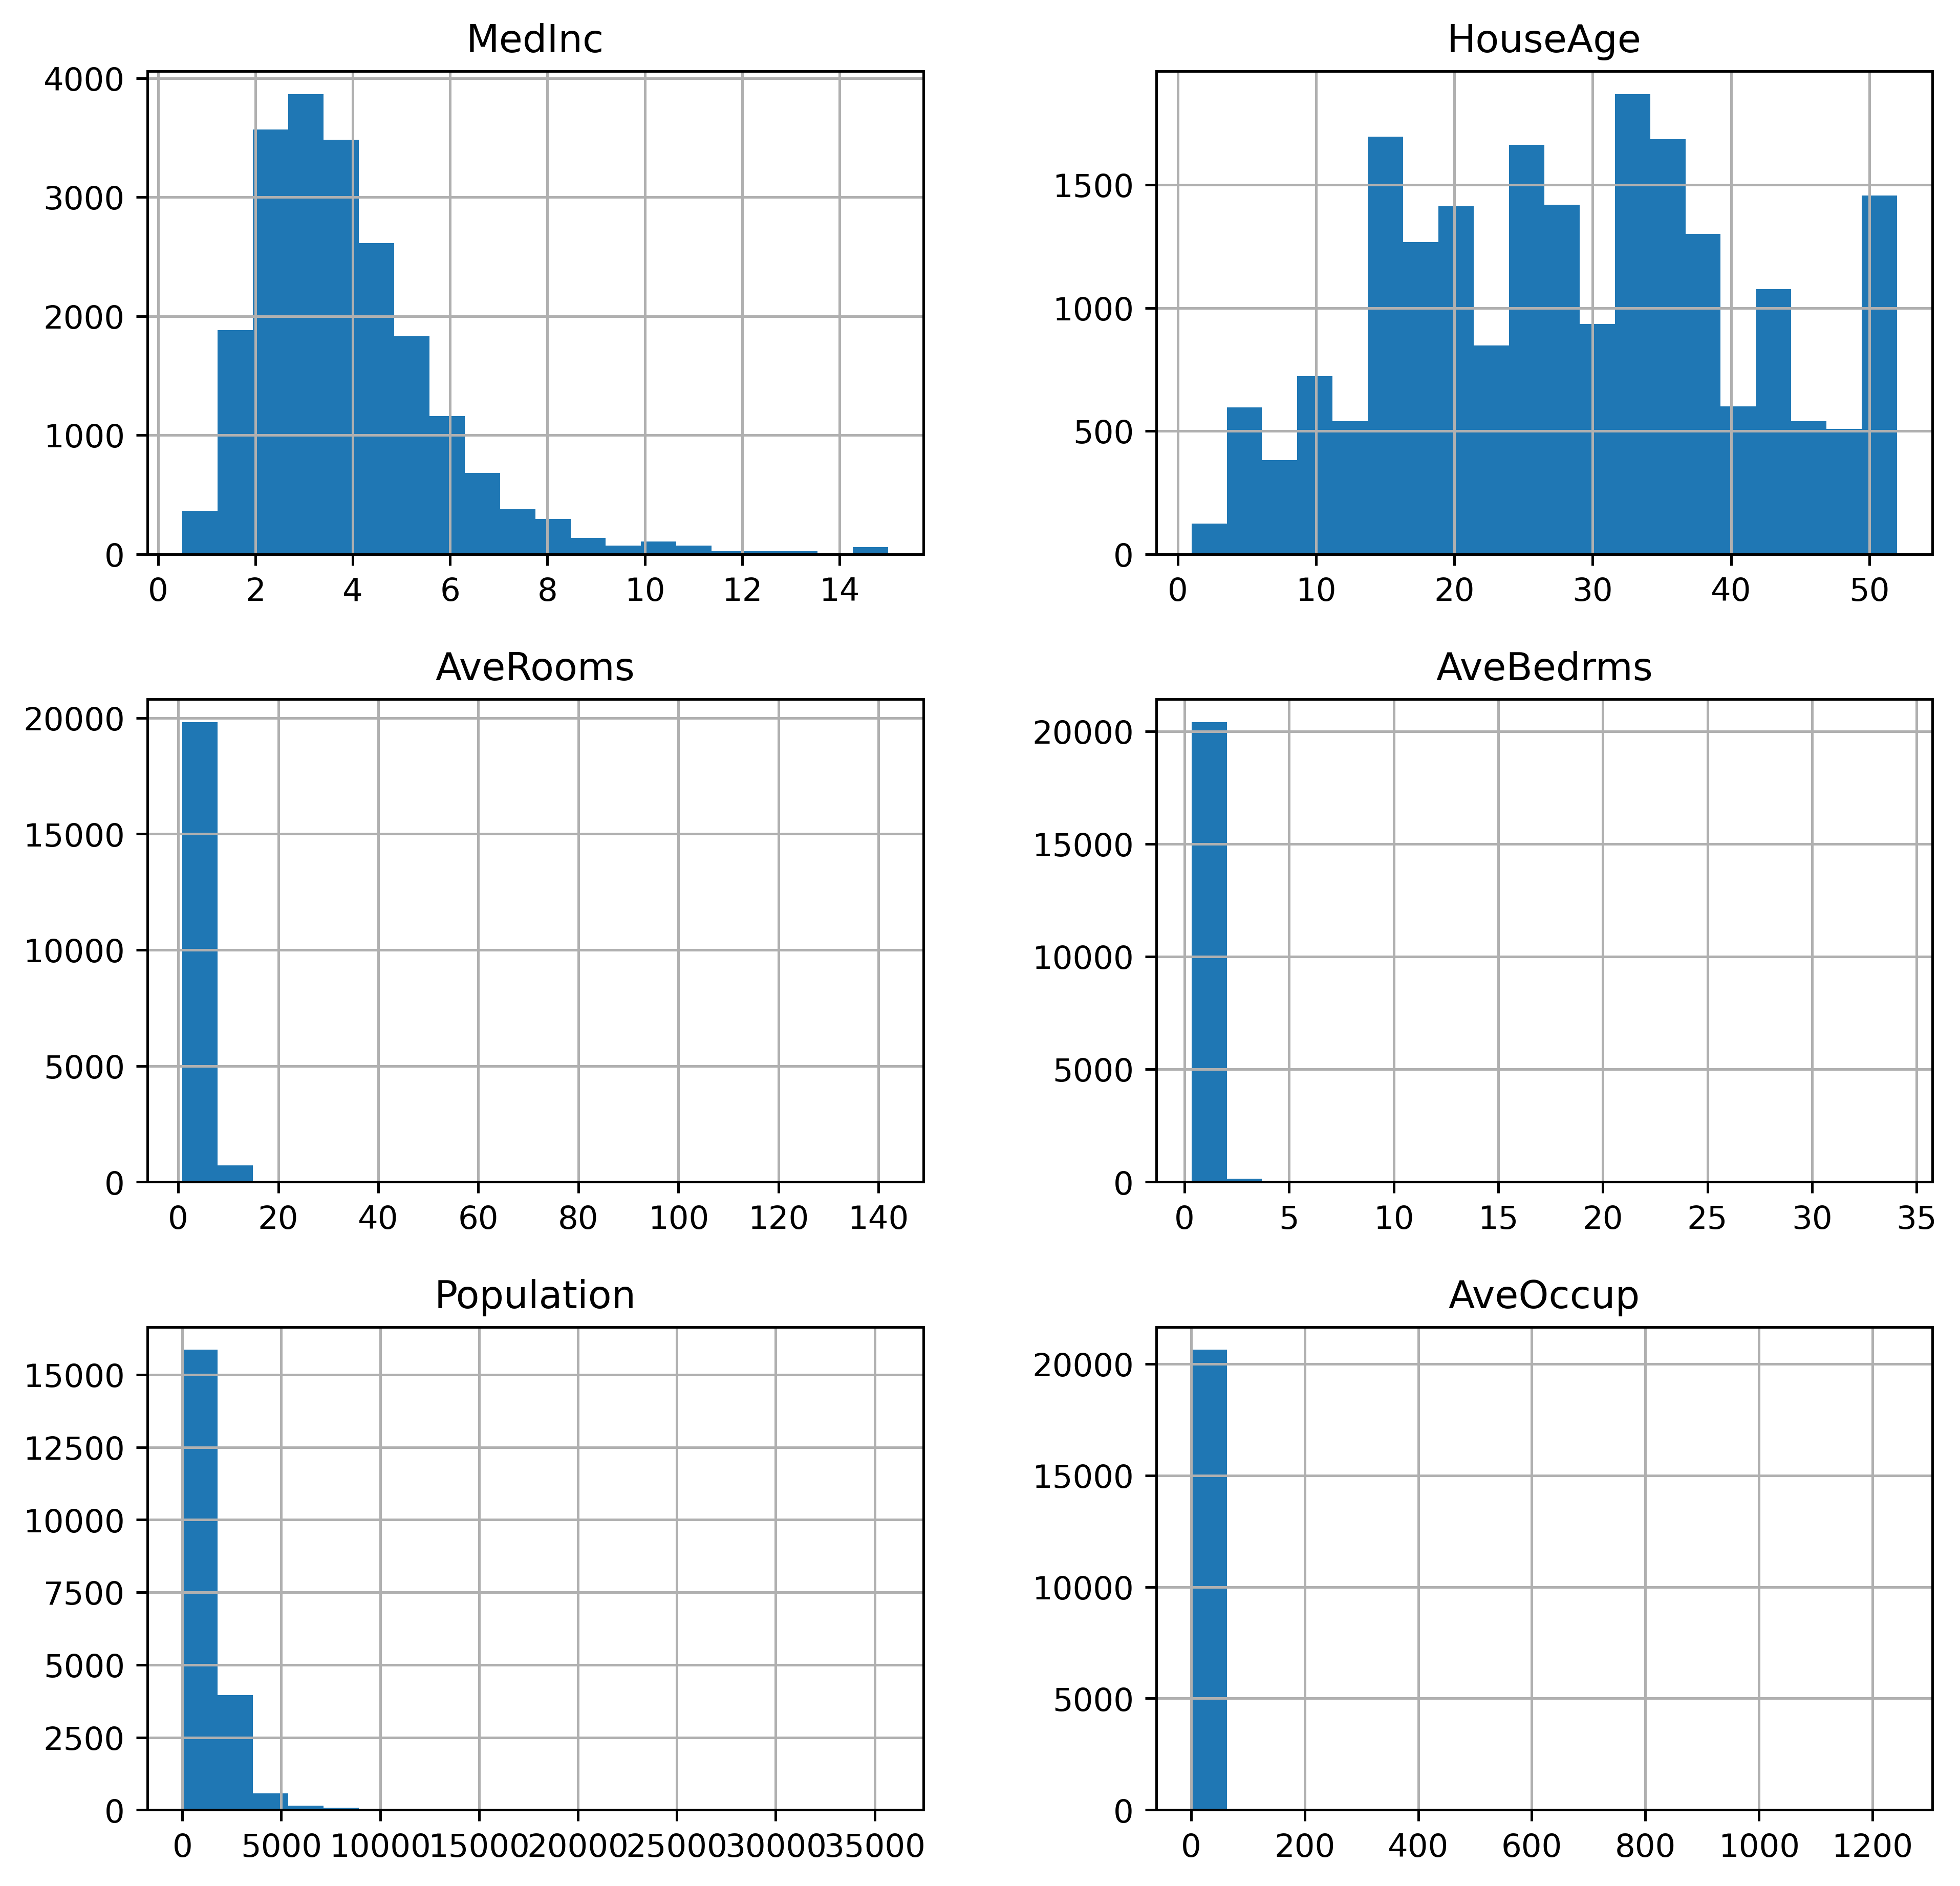

In [15]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

X.hist(bins=20, figsize=(10, 10))
plt.show()

In [12]:
linmod = Ridge(random_state=10)

cv = cross_validate(linmod, X, y)

mean_, std_ = np.mean(cv["test_score"]), np.std(cv["test_score"])

print(f"Model score: {mean_} +- {std_}")

Model score: 0.490618615960575 +- 0.03617289854929812


In [13]:
# get the name of the created features

spl = SplineTransformer(degree=3, n_knots=50)
ct = ColumnTransformer(
    [("splines", spl, ["AveRooms", "AveBedrms", "Population", "AveOccup"])],
    remainder="passthrough",
)
ct.fit(X, y)

cv = cross_validate(linmod, ct.transform(X), y)

mean_, std_ = np.mean(cv["test_score"]), np.std(cv["test_score"])

print(f"Model score: {mean_} +- {std_}")

Model score: 0.5553526813919297 +- 0.02244513992785257
